In [161]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib.pyplot import *

fname = "pswrgvwall.xls"

data = pd.read_excel(pd.ExcelFile(fname), sheet_name=1)
dates = data.iloc[2:,0].apply(lambda x: x.timestamp()).to_numpy()
graph_dates = data.iloc[2:,0].apply(lambda x: datetime.strftime(x, "%b %d, %Y"))
y = data.iloc[2:,1].dropna().to_numpy()
x = np.arange(0,len(y))


import random
# Markov

def stochastic(start,volitility=0.01,probability_coef=.50,iterations=1000):
    arr = np.zeros(iterations)

    initial = start
    for i in range(len(arr)):
        r = random.random()
        if r < probability_coef:
            initial += volitility * (random.random() + 1)
        else:
            initial -= volitility * (random.random() + 1)

        arr[i] = initial
    return arr



ValueError: x and y must have same first dimension, but have shapes (1752,) and (1746,)

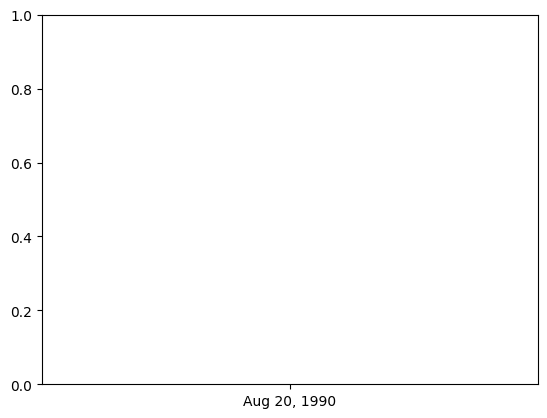

In [163]:
iters = 1200
# Average time difference 300600.0



start = dates[-1]
extended_dates = []
for i in range(iters):
    start += 300600
    extended_dates.append(start)
    


pos = len(y)-1
init = y[pos]
arr = stochastic(init,volitility=0.01,iterations=iters)

x_future = np.arange(pos, len(arr)+pos)



plot(graph_dates[],y,label="Current data")

rej = 0
for i in range(1000):
    arr = stochastic(init,volitility=0.09,iterations=iters,probability_coef=0.51)
    skip = False
    for j in arr:
        if j < 2:
            skip = True
        elif j > 24:
            skip = True
        pass
    if skip:
        rej += 1
        continue
    
    plot(x_future,arr,label="Predicted")
    break

title("Markov Stochastic for Gas prices")
xlabel("(3-5) Day Time Interval")
ylabel("Price")
legend()
grid("True")
print(f"Regected graphs: {rej}")
show()